<img src=".\img\dataset-cover.jpg">

# Stroke EDA

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Dataset source: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [15]:
# Data manipulation & Data visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

# Set the style of the plots
plt.style.use('seaborn-dark')
sns.set(font_scale=1.5)

# Visualize missing data
import missingno

# Dont display warnings
import warnings
warnings.filterwarnings('ignore')

# Get wget to download files
if os.name=='nt':
    !pip install wget
    import wget

Getting the helpful functions

In [16]:
if not os.path.exists('Extras'):
    !mkdir Extras
    !git clone https://github.com/JPCLima/EDA-Utils Extras

In [17]:
from Extras import plotting

### Importing 
Importing the dataset and presenting the details of the dataset

In [18]:
stroke = pd.read_csv(".\datasets\healthcare-dataset-stroke-data.csv")
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Missing Values
Let's check if there is null values of the stroke dataset

In [19]:
null_values = pd.DataFrame(stroke.isna().sum(), columns=['# null values'])
null_values

,# null values
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


<AxesSubplot:>

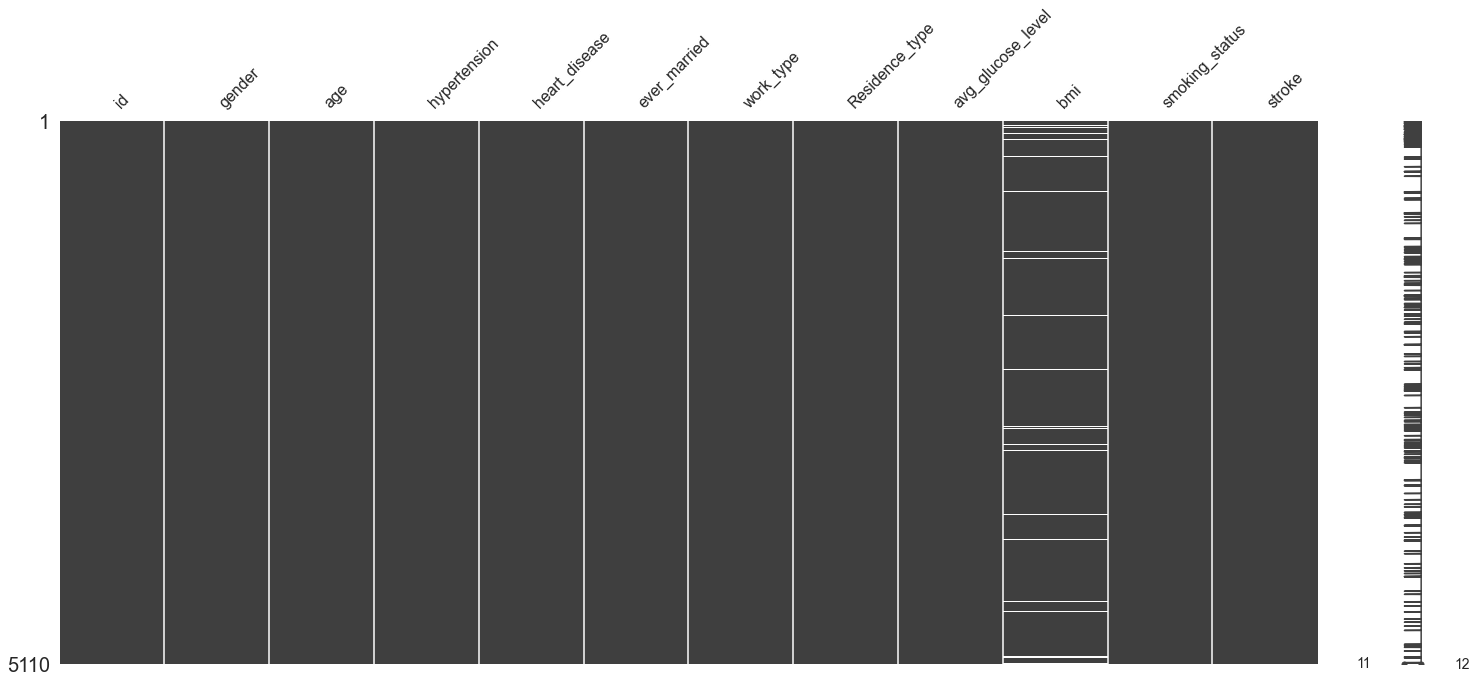

In [20]:
missingno.matrix(stroke)

As we can see there is missing values in bmi column. To fill the missing values we are going to use the mean 

<AxesSubplot:>

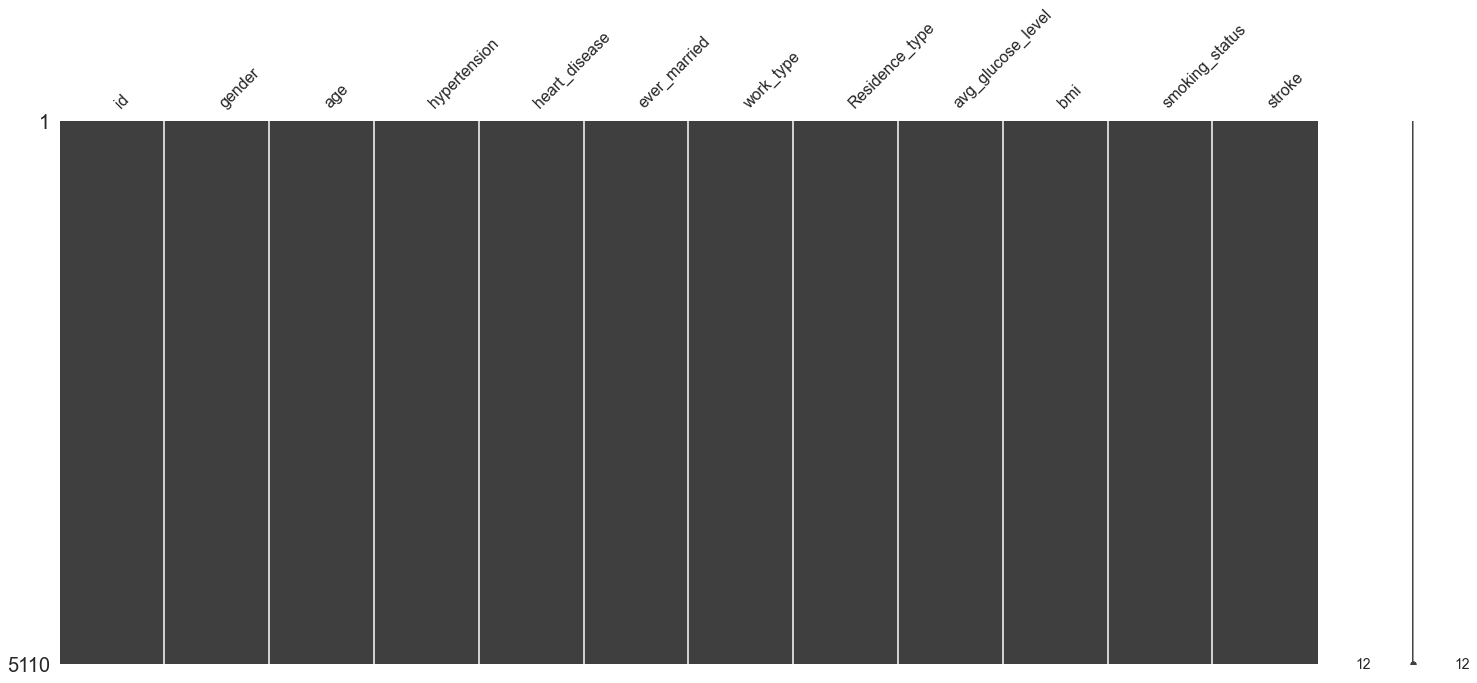

In [21]:
stroke.bmi.fillna(stroke.bmi.mean(), inplace=True)
missingno.matrix(stroke)

### Duplicates
Let's verify if there is duplicates

In [22]:
duplicate_values = stroke.duplicated().unique()
duplicate_values

array([False])

Number of records per gender
> As we can see in the bar plot there is more Male then Female  

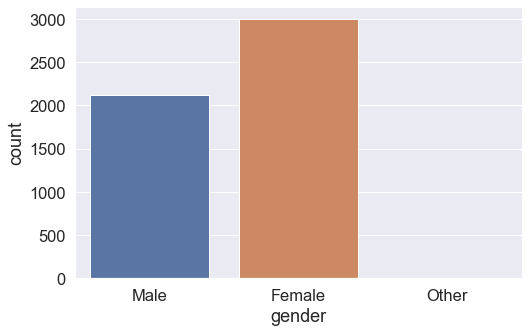

In [23]:
fig = plt.figure(figsize = (8,5))

sns.countplot(stroke.gender);

In [24]:
pd.DataFrame(stroke.gender.value_counts())

,gender
Female,2994
Male,2115
Other,1


Remove the only "Other" gender from the dataset, since will not add nothing to the model

In [25]:
stroke = stroke.drop(stroke[stroke.gender=="Other"].index)
pd.DataFrame(stroke.gender.value_counts())

,gender
Female,2994
Male,2115


### Data Distribution

Display how the data is distributed on the dataset

What is the target?
> Target is the stroke 0 for not have and 1 for have

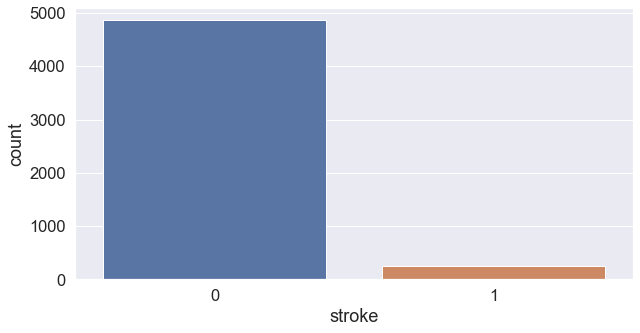

In [26]:
fig = plt.figure(figsize = (10,5))
sns.countplot(stroke['stroke']);

How has more probability to have stroke according with the dataset?
>

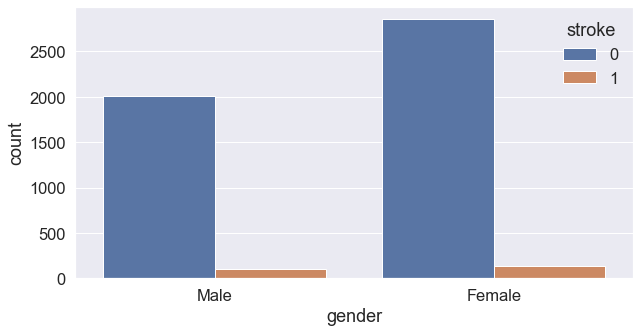

In [36]:
fig = plt.figure(figsize = (10,5))
sns.countplot(x="gender", data=stroke, hue="stroke");